Lo primero que se hace, en pro del análisis de las bases de datos, es importar las diferentes librerías que se utilizaran a lo largo del trabajo. Luego se cargan los datos sobre la distribución del tiempo en un dataframe denominado time_use, para posteriormente cambiar las entradas cuyo país sea 'China (People's Republic of)' por simplemente 'China', para efectos prácticos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import seaborn as sns

time_use = pd.read_csv(r'C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Bases de datos\\Time use\\TIME_USE_OECD.csv')
time_use = time_use.drop(columns=['SEX', 'AGE', 'T', 'Flag Codes', 'Flags'])

time_use
time_use['Country'] = time_use['Country'].replace("China (People's Republic of)", 'China')
time_use.iloc[[75,168,261, 353, 446], 1]
time_use_2 = time_use[time_use['Sex'] == 'Total']
time_use_2[time_use_2['Country'].str.contains('China')]

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value
75,CHN,China,UPW,Unpaid work,Total,15-64,Latest year,163.886180
168,CHN,China,PCA,Personal care,Total,15-64,Latest year,693.518370
261,CHN,China,LEI,Leisure,Total,15-64,Latest year,227.841780
353,CHN,China,OTH,Other,Total,15-64,Latest year,14.989591
446,CHN,China,PAW,Paid work or study,Total,15-64,Latest year,339.764040


A continuación, se cargan la base datos de la productividad por hora trabajada para los diferentes países en un dataframe llamada productividad_vs_horas. Seguidamente se eliminan aquellas entradas que contengan NA's, así como aquellas columnas que no contengan información relevante, y se segmenta de manera que solo aparezcan las entradas del 2019.

Combinada representa la combinación de las dos bases de datos descritas previamente, siendo el país el ancla bajo el cual agrupan.

In [3]:
productividad_vs_horas = pd.read_csv(r'C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Bases de datos\\Time use\\productivity-vs-annual-hours-worked.csv')
productividad_vs_horas=productividad_vs_horas.dropna(subset=['Annual working hours per worker']).drop(columns = ['Continent'])
productividad_vs_horas = productividad_vs_horas[productividad_vs_horas['Year']== 2019]

#Se juntan ambas bases de datos con el fín de ver alguna posible correlación entre la distribución del tiempo por país y si productividad
combinada = pd.merge(time_use_2, productividad_vs_horas, left_on="Country", right_on="Entity").drop('Entity', axis=1)
combinada.to_csv('Combinada.csv')
combinada

,LOCATION,Country,DESC,Description,Sex,Age,Time,Value,Code,Year,Annual working hours per worker,Productivity: output per hour worked,Population (historical estimates)
0,AUS,Australia,UPW,Unpaid work,Total,15-64,Latest year,243.168870,AUS,2019,1726.7976,61.438488,25357168.0
1,AUS,Australia,PCA,Personal care,Total,15-64,Latest year,657.456540,AUS,2019,1726.7976,61.438488,25357168.0
2,AUS,Australia,LEI,Leisure,Total,15-64,Latest year,281.195280,AUS,2019,1726.7976,61.438488,25357168.0
3,AUS,Australia,OTH,Other,Total,15-64,Latest year,20.013899,AUS,2019,1726.7976,61.438488,25357168.0
4,AUS,Australia,PAW,Paid work or study,Total,15-64,Latest year,238.165390,AUS,2019,1726.7976,61.438488,25357168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,LTU,Lithuania,UPW,Unpaid work,Total,15-64,Latest year,224.471330,LTU,2019,1886.0845,34.452484,2849083.0
151,LTU,Lithuania,PCA,Personal care,Total,15-64,Latest year,645.538640,LTU,2019,1886.0845,34.452484,2849083.0
152,LTU,Lithuania,LEI,Leisure,Total,15-64,Latest year,246.606800,LTU,2019,1886.0845,34.452484,2849083.0
153,LTU,Lithuania,OTH,Other,Total,15-64,Latest year,8.168073,LTU,2019,1886.0845,34.452484,2849083.0


Se proceden a realizar los gráficos sobre la cantidad de tiempo que dedican las personas a las distintas actividades en su día a día. Estos gráficos apareceran en el capítulo correspondiente al desarollo del objetivo 1. 

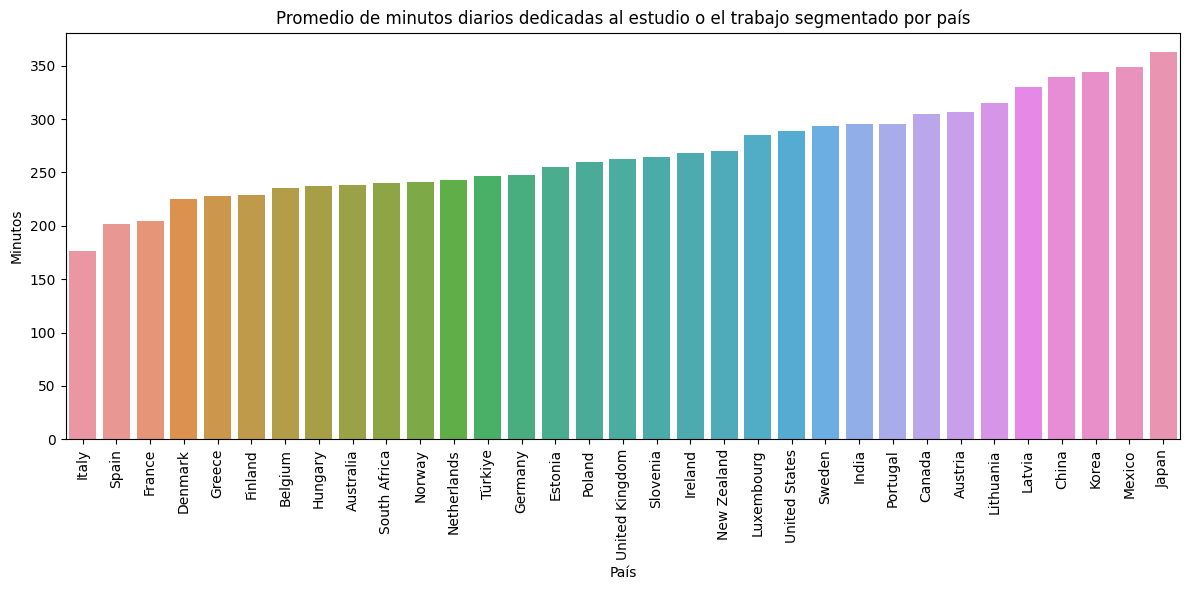

In [4]:
ordenada_2 = time_use_2[time_use_2["Description"] == 'Paid work or study'].sort_values(by=['Value'])
ordenada_2

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=ordenada_2, x='Country', y='Value', alpha=1, ax=ax1)
ax1.set_ylabel('Minutos')
ax1.set_xlabel('País')
plt.title('Promedio de minutos diarios dedicadas al estudio o el trabajo segmentado por país')
plt.tight_layout() #Se usa para que a la hora de guardar los plots como imágenes no queden las etiquetas de los ejes cortadas.

res = fig.get_figure() #Se guarda la figura.
res.savefig('C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Gráficos\\trabajo o estudio.jpg') 

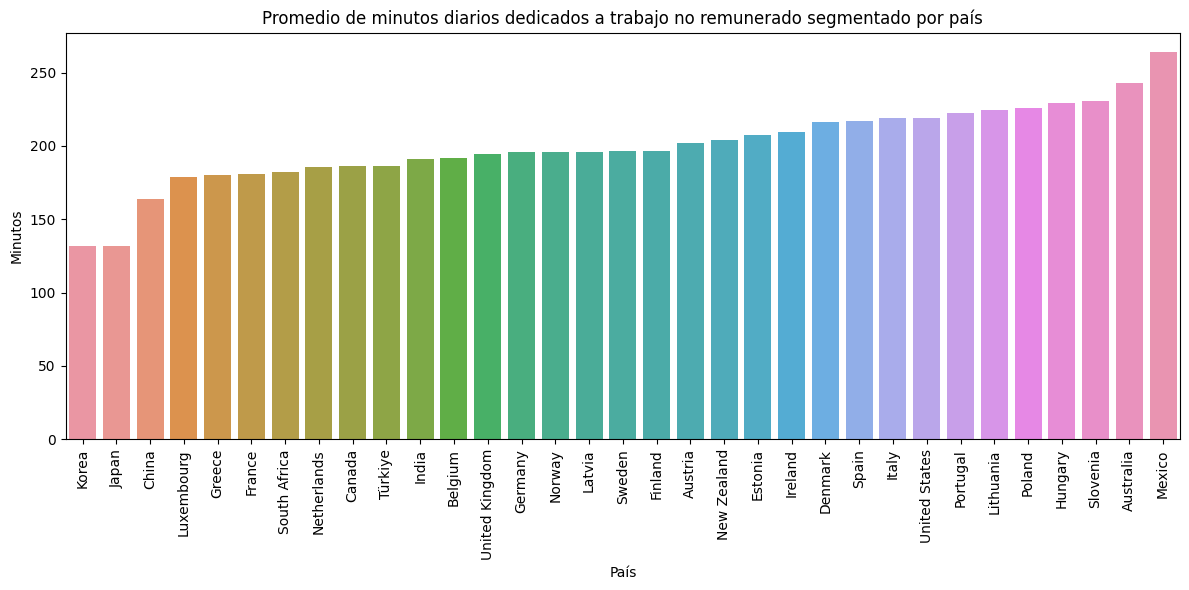

In [5]:

prueba = time_use[time_use['Sex'] == 'Total']
ordenada_3 = prueba[prueba["Description"] == 'Unpaid work'].sort_values(by=['Value'])
ordenada_3

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=ordenada_3, x='Country', y='Value', alpha=1, ax=ax1)
ax1.set_ylabel('Minutos')
ax1.set_xlabel('País')
plt.title('Promedio de minutos diarios dedicados a trabajo no remunerado segmentado por país')
plt.tight_layout()

res = fig.get_figure()
res.savefig('C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Gráficos\\trabajo no remunerado.jpg') 

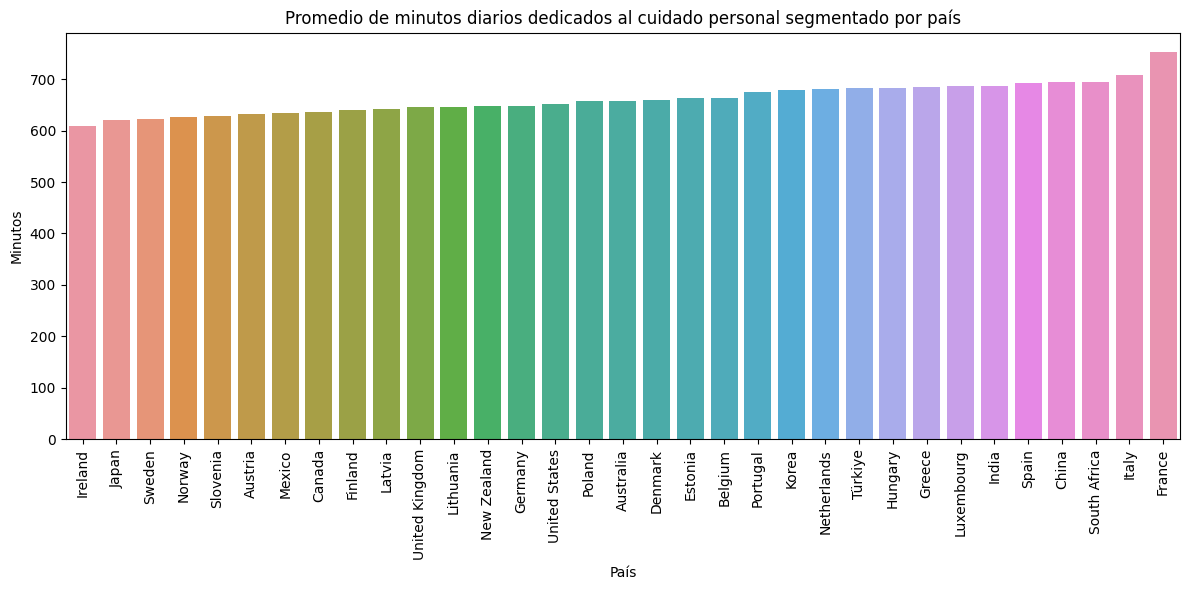

In [6]:
ordenada_3 = time_use_2[time_use_2["Description"] == 'Personal care'].sort_values(by=['Value'])
ordenada_3

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=ordenada_3, x='Country', y='Value', alpha=1, ax=ax1)
ax1.set_ylabel('Minutos')
ax1.set_xlabel('País')
plt.title('Promedio de minutos diarios dedicados al cuidado personal segmentado por país')
plt.tight_layout()

res = fig.get_figure()
res.savefig('C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Gráficos\\cuidado personal.jpg') 

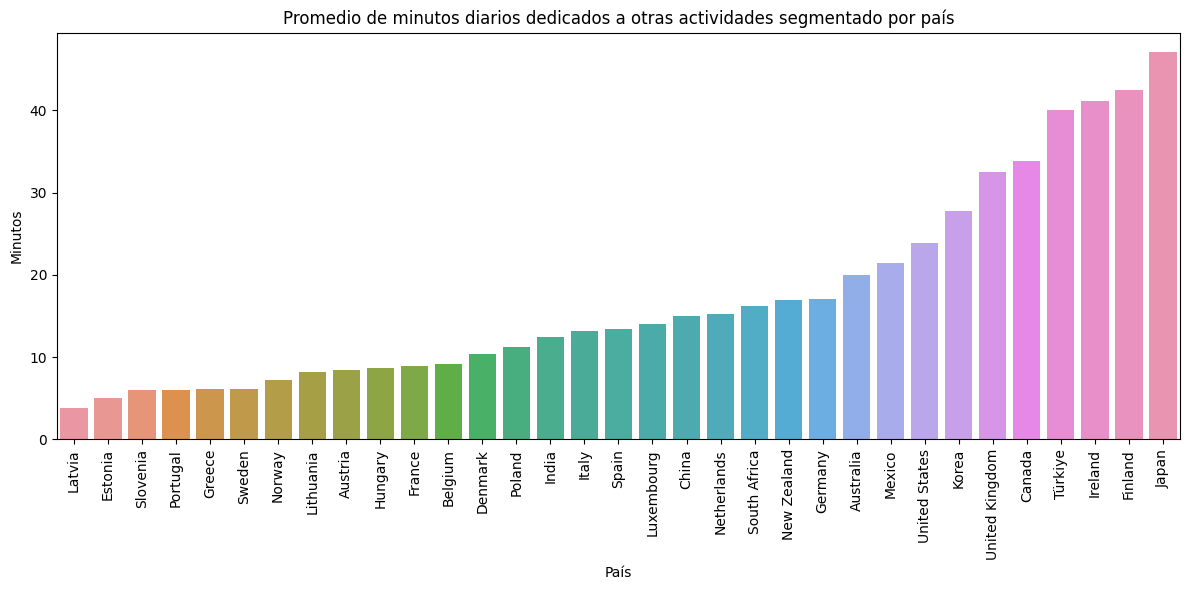

In [7]:
ordenada_4 = time_use_2[time_use_2["Description"] == 'Other'].sort_values(by=['Value'])
ordenada_4

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=ordenada_4, x='Country', y='Value', alpha=1, ax=ax1)
ax1.set_ylabel('Minutos')
ax1.set_xlabel('País')
plt.title('Promedio de minutos diarios dedicados a otras actividades segmentado por país')
plt.tight_layout()

res = fig.get_figure()
res.savefig('C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Gráficos\\Otros.jpg') 

Lo que sigue son los gráficos con los cuales se abrirá el capítulo de las correlaciones. Los primeros dos gráficos muestran las relaciones entre ocio-productividad y horas trabajadas-productividad. Se ordenan las entradas de los países de manera que queden en orden ascendente con respecto al tiempo de ocio.

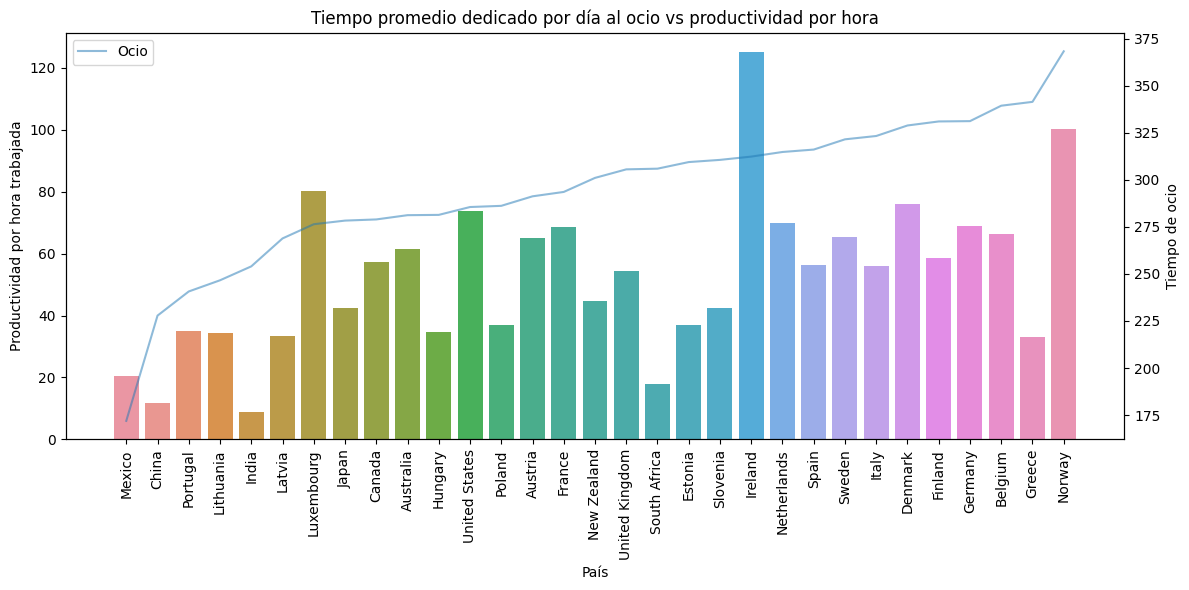

In [8]:
ordenada = combinada[combinada['Description'] == 'Leisure'].sort_values(by=['Value'])

matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=ordenada, x='Country', y='Productivity: output per hour worked', alpha=1, label= 'Productividad', ax=ax1)
ax1.set_ylabel('Productividad por hora trabajada')
ax2 = ax1.twinx() #Para tener el doble eje, cada uno para su respectivo tipo de gráfico.

sns.lineplot(data=ordenada, x='Country', y='Value', alpha=0.5, label = 'Ocio', ax=ax2)
ax2.set_ylabel('Tiempo de ocio')
ax1.set_xlabel('País')
plt.title('Tiempo promedio dedicado por día al ocio vs productividad por hora')
plt.tight_layout()

res = fig.get_figure()
res.savefig('C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Gráficos\\Ocio vs productividad.jpg') 

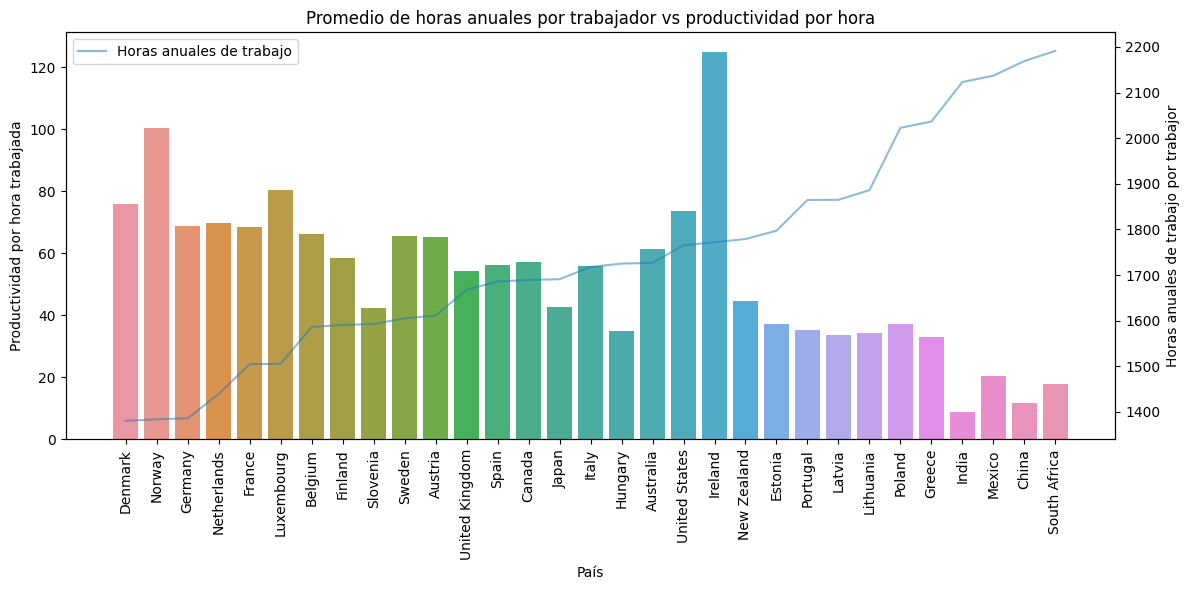

In [9]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=ordenada.sort_values(['Annual working hours per worker']), x='Country', y='Productivity: output per hour worked', alpha=1, label = 'Productividad', ax=ax1)
ax1.set_ylabel('Productividad por hora trabajada')
ax2 = ax1.twinx()

sns.lineplot(data=ordenada.sort_values(['Annual working hours per worker']), x='Country', y='Annual working hours per worker', alpha=0.5, label = 'Horas anuales de trabajo', ax=ax2)
ax2.set_ylabel('Horas anuales de trabajo por trabajor')
ax1.set_xlabel('País')
plt.title('Promedio de horas anuales por trabajador vs productividad por hora')
plt.tight_layout()

res = fig.get_figure()
res.savefig('C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Gráficos\\horas anuales vs productividad.jpg') 

Lo siguiente es la aplicación de los coeficientes de correlación de Pearson y Spearman respectivamente. Se hace uso del paquete stats, el cual incluye las funciones pearsonr y spearmanr. 

Previo al inicio de la implementación, es pertinente notar las bases de datos a utilizar y su motivo:

* combinada -> base que contiene las distribuciones del tiempo de la población total así como la productividad por horas.
* combinada_2 -> lo mismo que la anterior, pero unicamente para mujeres. Esto facilitará la implementación de las correlaciones por género.
* combinada_3 -> Análoga a la previa, pero en este caso para hombres.

Ambas funciones (pearson y spearman) reciben dos valores como parámetros, correspondientes a los datos para los cuales se quiere determinar su posible correlación. En este caso, para mayor practicidad, en vez de ir realizando la tarea una por una, se mapea la función y se le pasan dos listas de 5 elementos cada una, en donde cada entrada de cada lista representa una segmentación del dataframe por actividad realizada (en el caso de la primera lista) o los valores de la productividad de cada país (en el caso de la segunda).

In [10]:
import numpy as np
from scipy import stats

pearson_totales = list(map(stats.pearsonr, [combinada[combinada['Description']=='Leisure']['Value'],
                                            combinada[combinada['Description']=='Personal care']['Value'],
                                            combinada[combinada['Description']=='Unpaid work']['Value'],
                                            combinada[combinada['Description']=='Paid work or study']['Value'],
                                            combinada[combinada['Description']=='Other']['Value']],
                            [combinada[combinada['Description']=='Leisure']['Productivity: output per hour worked']]*5))
pearson_t = pd.DataFrame(pearson_totales, columns=['Estadístico', 'p-valor']).round(decimals=6)
pearson_t.to_csv('pearson_totales.csv')

Los estadísticos y p-valores (en ese orden) resultantes son:
* Leisure vs productividad por hora trabajada: 0.5154936665158496 y 0.0035521136759108555.
* Personal care - prod : -0.23398619965441242 y 0.21331491158607982
* Unpaid work - prod: -0.1116182700397412 y 0.5570554771865053
* Paid work or study - prod: -0.26715192475551724 y 0.1535319576477765
* Otros - prod: 0.2501627037885509 y 0.18243644111670115

Veamos lo que sucede con la de Spearman

In [11]:
lista_1 = [combinada[combinada['Description']=='Leisure']['Value'], combinada[combinada['Description']=='Personal care']['Value'],
  combinada[combinada['Description']=='Unpaid work']['Value'], combinada[combinada['Description']=='Paid work or study']['Value'],
  combinada[combinada['Description']=='Other']['Value']]

lista_2 = [i.strip("'") for i in ["combinada[combinada['Description']==" + "'" + x + "'" + "]['Value']" for x in combinada['Description'].unique()]]

coeficientes = list(map(stats.spearmanr, lista_1, [combinada[combinada['Description']=='Leisure']['Productivity: output per hour worked']]*5))
spearman_totales = pd.DataFrame(coeficientes, columns=['Estadístico', 'p-valor']).round(decimals=6)
spearman_totales.to_csv('spearman_totales.csv')


* Para el caso de Leisure vs horas de productividad: correlación = 0.45317018909899887 y p-valor = 0.011906953669514478
* Para el caso de Personal care vs horas de productividad : correlación= -0.1835372636262514, p-valor = 0.3316281105766702
* Trabajo no remunerado vs horas de productividad = correlación = -0.1604004449388209, p-valor = 0.3971508169232242
* Trabajo remunerado o estudio vs horas de productividad: correlación = -0.2551724137931034, p-valor = 0.1735442551180174
* Otros vs horas de productividad : correlación = 0.2556173526140155, p-valor = 0.17276956957008888

Todos estos casos son analizados con base a los valores de la población total. Otra posible indagación es separarlo en hombres y mujeres, de manera que:

In [12]:
#Caso mujeres

time_use_3 = time_use[time_use['Sex'] == 'Women']
combinada_2 = pd.merge(time_use_3, productividad_vs_horas, left_on="Country", right_on="Entity").drop('Entity', axis=1)

#La base de datos omitía el valor del ocio para las mujeres de Sudáfrica. Sin embargo, dado que se conocían las medias totales y de los hombres,
#se realiza simple cálculo para obtener el dato.
leisure_value_women_SA = (time_use[time_use['Country']=='South Africa'].iloc[6,7]*2) - time_use[time_use['Country']=='South Africa'].iloc[7,7]
faltante = ['ZAF', 'South Africa', 'LEI', 'Leisure', 'Women', '15-64', 'Latest year', leisure_value_women_SA, 'ZAF', 2019, 2191.3633, 17.969189, 58087060.0]

combinada_2.loc[len(combinada_2.index)] = faltante
combinada_2.to_csv('Combinada_mujeres.csv')
division_1 = [combinada_2[combinada_2['Description']=='Leisure']['Value'], combinada_2[combinada_2['Description']=='Personal care']['Value'],
                  combinada_2[combinada_2['Description']=='Unpaid work']['Value'], 
                  combinada_2[combinada_2['Description']=='Paid work or study']['Value'], combinada_2[combinada_2['Description']=='Other']['Value']]
division_2 = [combinada_2[combinada_2['Description']=='Personal care']['Productivity: output per hour worked']]*5

coeficientes_mujeres = list(map(stats.spearmanr, division_1,  division_2))
spearman_mujeres = pd.DataFrame(coeficientes_mujeres, columns=['Estadístico', 'p-valor']).round(decimals=6)
spearman_mujeres.to_csv('spearman_mujeres.csv')

* Leisure-productivity hours: Se tiene una correlación de 0.5150166852057843 y un p-valor de 0.003588265581097248
* Personal care - productivity hours: La correlación es de -0.01268075639599555 y un p-valor de 0.9469744867472
* Unpaid work - productivity hours: En este caso, la correlación es de -0.4852057842046719 y un p-valor de 0.006572727411186284
* Paid work or study - productivity hours: La correlación corresponde a -0.11679644048943269 y un p-valor de 0.5387877269264418
* Personal care - productivity hours: Se tiene una correlación de 0.17330367074527253 y un p-valor de 0.35974765131618736

In [13]:
# Correlación Pearson para mujeres

pearson_mujeres = list(map(stats.pearsonr, [combinada_2[combinada_2['Description']=='Leisure']['Value'], combinada_2[combinada_2['Description']=='Personal care']['Value'],
  combinada_2[combinada_2['Description']=='Unpaid work']['Value'], combinada_2[combinada_2['Description']=='Paid work or study']['Value'],
  combinada_2[combinada_2['Description']=='Other']['Value']], [combinada_2[combinada_2['Description']=='Leisure']['Productivity: output per hour worked']]*5))
pearson_m = pd.DataFrame(pearson_mujeres, columns=['Estadístico', 'p-valor']).round(decimals=6)
pearson_m.to_csv('pearson_mujeres.csv')

In [14]:
#Correlación de Spearman para hombres

time_use_4 = time_use[time_use['Sex'] == 'Men']
combinada_3 = pd.merge(time_use_4, productividad_vs_horas, left_on="Country", right_on="Entity").drop('Entity', axis=1)
combinada_3.to_csv('Combinada_hombres.csv')

division_3 = [combinada_3[combinada_3['Description']=='Leisure']['Value'], 
              combinada_3[combinada_3['Description']=='Personal care']['Value'],
              combinada_3[combinada_3['Description']=='Unpaid work']['Value'], 
              combinada_3[combinada_3['Description']=='Paid work or study']['Value'], 
              combinada_3[combinada_3['Description']=='Other']['Value']]

coeficientes_hombres = list(map(stats.spearmanr, division_3, [combinada_3[combinada_3['Description']=='Personal care']['Productivity: output per hour worked']]*5))
spearman_hombres = pd.DataFrame(coeficientes_hombres, columns=['Estadístico', 'p-valor']).round(decimals=6)
spearman_hombres.to_csv('spearman_hombres.csv')

Para el caso de los hombres, los coeficientes de correlación (con su respectivo p-valor) serían:

* Leisure- Prod : correlación=0.3753058954393771, pvalor=0.04098544618558149
* Personal Care - Prod: correlación=-0.32057842046718577, pvalor=0.08413373020217751
* Unpaid Work - Prod: correlación=0.36774193548387096, pvalor=0.04557613759427911
* Paid work or study - produc: correlación=-0.29699666295884314, pvalor=0.11098157911041852
* Otros - Prod: correlación=0.2783092324805339, pvalor=0.1364367686460805

In [15]:
# Correlación de Pearson para hombres

pearson_hombres = list(map(stats.pearsonr, [combinada_3[combinada_3['Description']=='Leisure']['Value'], combinada_3[combinada_3['Description']=='Personal care']['Value'],
  combinada_3[combinada_3['Description']=='Unpaid work']['Value'], combinada_3[combinada_3['Description']=='Paid work or study']['Value'],
  combinada_3[combinada_3['Description']=='Other']['Value']], [combinada_3[combinada_3['Description']=='Leisure']['Productivity: output per hour worked']]*5))
pearson_h = pd.DataFrame(pearson_hombres, columns=['Estadístico', 'p-valor']).round(decimals=6)
pearson_h.to_csv('pearson_hombres.csv')

En el siguiente chunk se procede a concatenar todos los datos de correlación de pearson y todos los de spearman, para formar dos tablas finales con todos los datos.

In [16]:
pearson_completo = pd.concat([pearson_t, pearson_m, pearson_h], axis=1)
pearson_completo.to_csv('pearson_completo.csv')

spearman_completo = pd.concat([spearman_totales, spearman_mujeres, spearman_hombres], axis=1)
spearman_completo.to_csv('spearman_completo.csv')
pearson_completo

,Estadístico,p-valor,Estadístico,p-valor,Estadístico,p-valor
0,0.561950,0.001002,0.607371,0.000291,0.476586,0.006718
1,-0.278895,0.128678,-0.067038,0.720106,-0.403500,0.024389
2,-0.014842,0.936836,-0.345099,0.057256,0.444653,0.012202
3,-0.333756,0.066517,-0.344117,0.058015,-0.359872,0.046753
4,0.244084,0.185745,0.262249,0.154092,0.265908,0.148219


Luego se realizan ambos test entre las horas trabajadas anualmente y la productividad por hora

In [19]:
cantidad_total = stats.spearmanr(combinada['Annual working hours per worker'], combinada['Productivity: output per hour worked'])
cantidad_total
cantidad_total_2 = stats.pearsonr(combinada['Annual working hours per worker'], combinada['Productivity: output per hour worked'])
print(cantidad_total, cantidad_total_2)

SpearmanrResult(correlation=-0.8129032258064517, pvalue=9.465634230084414e-38) (-0.7402436634361949, 3.6158327559035364e-28)


En siguiente chunk se hacen agrupaciones con el fin de realizar un test de independencia. Para ello, se segmenta el intervalo de los valores del ocio en 3 partes equitativas, asignandole la palabra bajo, medio o alto según corresponda. Lo mismo se aplica con la preductividad, pero esta vez con solo dos categorías: baja y alta. 

In [20]:
ocio = combinada[combinada['Description']== 'Leisure']
delimitador = (combinada[combinada['Description']== 'Leisure']['Value'].max() - combinada[combinada['Description']== 'Leisure']['Value'].min())/3
delimitador

def cantidad(valor):
    if valor < (combinada[combinada['Description']== 'Leisure']['Value'].min() + delimitador):
        return 'bajo'
    elif valor < (combinada[combinada['Description']== 'Leisure']['Value'].min() + (2*delimitador)):
        return 'medio'
    else:
        return 'alto'

def cantidad_2(valor):
    delimitador_2 = (combinada[combinada['Description']== 'Leisure']['Productivity: output per hour worked'].max() - combinada[combinada['Description']== 'Leisure']['Productivity: output per hour worked'].min())/2
    if valor < (combinada[combinada['Description']== 'Leisure']['Productivity: output per hour worked'].min() + delimitador_2):
        return 'Productividad baja'
    else:
        return 'Productividad alta'

ocio['División de Ocio'] = ocio['Value'].map(cantidad)
ocio['División de productividad'] = ocio['Productivity: output per hour worked'].map(cantidad_2)
ocio = ocio[['Country', 'División de Ocio', 'División de productividad']]
ocio

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11044\3819133040.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocio['División de Ocio'] = ocio['Value'].map(cantidad)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_11044\3819133040.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocio['División de productividad'] = ocio['Productivity: output per hour worked'].map(cantidad_2)


,Country,División de Ocio,División de productividad
2,Australia,medio,Productividad baja
7,Austria,medio,Productividad baja
12,Belgium,alto,Productividad baja
17,Canada,medio,Productividad baja
22,Denmark,alto,Productividad alta
27,Finland,alto,Productividad baja
32,France,medio,Productividad alta
37,Germany,alto,Productividad alta
42,Greece,alto,Productividad baja
47,Hungary,medio,Productividad baja


In [21]:
pd.crosstab(ocio['División de Ocio'], ocio['División de productividad']) #Se realiza el crosstab para tener un dataframe de conteos

División de productividad,Productividad alta,Productividad baja
División de Ocio,,
alto,5,10
bajo,0,2
medio,3,11


Se llega a la conclusión de que no es posible realizar el test de independencia, pues una de las premisas iniciales es que ninguna de las entradas puede tener menos de 5 valores esperados. En nuestro caso, la entrada de bajo nivel de ocio con una alta productividad no posee ningún valor esperado.  

Por otro lado, en el siguiente código se ingresa la base de datos de la mortalidad para los países seleccionados y se concatena con el ocio, la productividad  y el deporte, con el fin de graficarlos posteriormente. Estos gráficos son los que apareceran en el capítulo referente a la relación entre la distribución del tiempo con la salud y con el bienestar económico.

In [27]:
actividades = pd.read_excel(r'C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Time-Use-in-OECD-Countries-OECD.xlsx')
actividades['Category'].unique()
actividades[actividades['Category']=='Housework'].sort_values(by=['Time (minutes)'])

mortalidad = pd.read_excel(r'C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Bases de datos\\Time use\\tasa de mortalidad.xlsx').drop(['Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7'], axis=1)
mortalidad['Países'] = mortalidad['Países'].str.rstrip()
mortalidad['Tasa mortalidad'] = mortalidad['Tasa mortalidad'].str.replace('\W', '', regex=True).apply(pd.to_numeric)
mortalidad['Tasa mortalidad'] = mortalidad['Tasa mortalidad']/100
mortalidad['Tasa mortalidad']

combinada_salud = pd.merge(time_use_2[time_use_2['Description']=='Leisure'], mortalidad, left_on='Country', right_on='Países').drop(['Países'], axis=1)
combinada_salud
combinada_salud_2 = pd.merge(productividad_vs_horas, mortalidad, left_on='Entity', right_on='Países').drop(['Países'], axis=1)
combinada_salud_2
combinada_salud_3 = pd.merge(actividades[actividades['Category']== 'Sports'], mortalidad, left_on='Country', right_on='Países').drop(['Países'], axis=1)
combinada_salud_3


,Country,Category,Time (minutes),Fecha,Muertes,Tasa mortalidad,Var.
0,Australia,Sports,19.013204,2019,171.031,6.70,0.40
1,Canada,Sports,20.998791,2019,285.769,7.60,-0.10
2,Finland,Sports,37.230850,2019,53.949,9.80,-0.10
3,France,Sports,11.961101,2019,613.388,9.10,0.00
4,Germany,Sports,26.435250,2019,939.520,11.30,-0.20
5,Japan,Sports,10.222600,2019,1.413.675,11.20,0.20
6,Mexico,Sports,13.573350,2019,747.784,6.93,0.08
7,New Zealand,Sports,17.000000,2019,34.254,6.87,0.09
8,Portugal,Sports,12.083916,2019,111.793,10.90,-0.10
9,Spain,Sports,41.877960,2019,418.703,8.83,-0.26


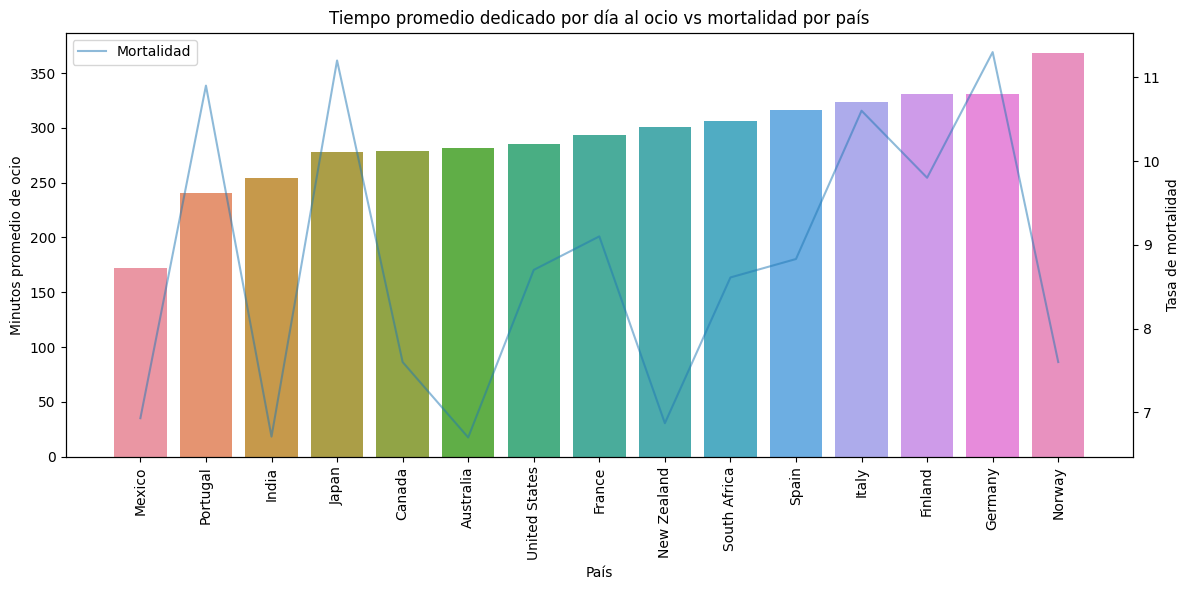

In [28]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=combinada_salud.sort_values(by=['Value']), x='Country', y='Value', alpha=1, label= 'Valor del Ocio', ax=ax1)
ax1.set_ylabel('Minutos promedio de ocio')
ax2 = ax1.twinx()

sns.lineplot(data=combinada_salud.sort_values(by=['Value']), x='Country', y='Tasa mortalidad', alpha=0.5, label = 'Mortalidad', ax=ax2)
ax2.set_ylabel('Tasa de mortalidad')
ax1.set_xlabel('País')
plt.legend(loc='upper left')
plt.title('Tiempo promedio dedicado por día al ocio vs mortalidad por país')
plt.tight_layout()

res = fig.get_figure()
res.savefig('C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Gráficos\\Ocio vs mortalidad.jpg') 

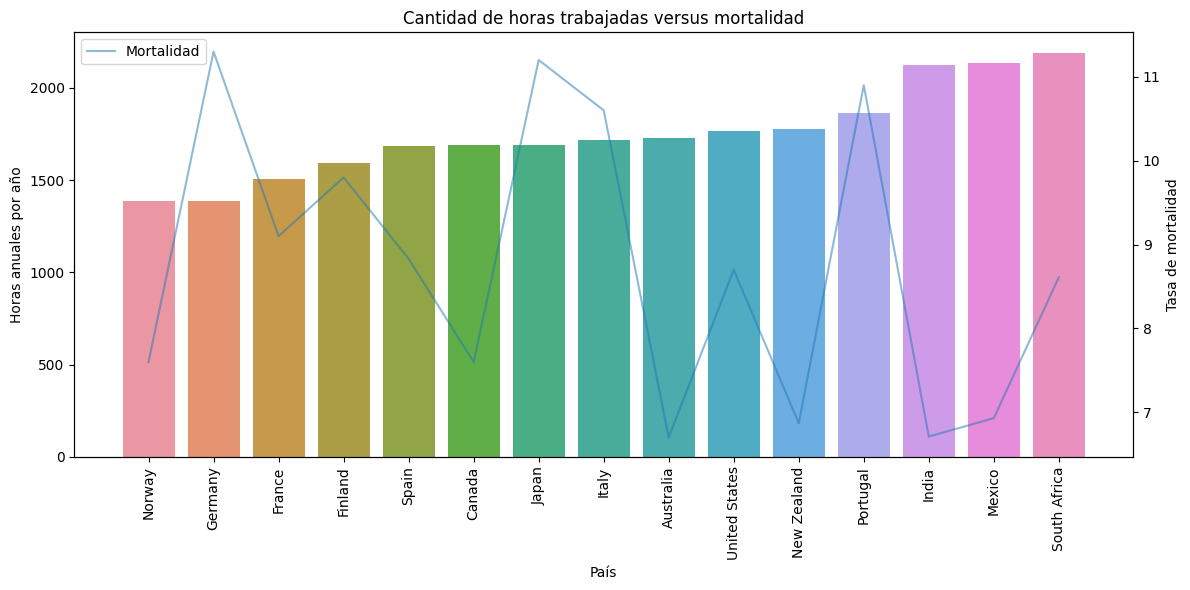

In [29]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=combinada_salud_2.sort_values(by=['Annual working hours per worker']), x='Entity', y='Annual working hours per worker', alpha=1, label= 'Horas anuales', ax=ax1)
ax1.set_ylabel('Horas anuales por año')
ax2 = ax1.twinx()

sns.lineplot(data=combinada_salud_2.sort_values(by=['Annual working hours per worker']), x='Entity', y='Tasa mortalidad', alpha=0.5, label = 'Mortalidad', ax=ax2)
ax2.set_ylabel('Tasa de mortalidad')
ax1.set_xlabel('País')
plt.legend(loc='upper left')
plt.title('Cantidad de horas trabajadas versus mortalidad')
plt.tight_layout()

res = fig.get_figure()
res.savefig('C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Gráficos\\Horas vs mortalidad.jpg') 

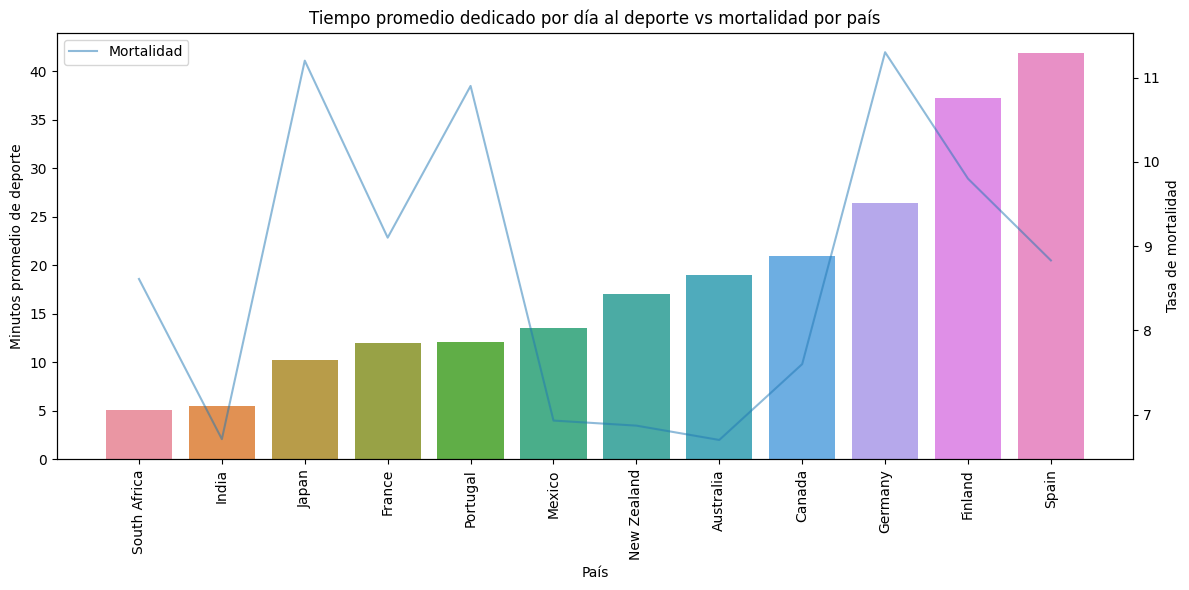

In [30]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=combinada_salud_3.sort_values(by=['Time (minutes)']), x='Country', y='Time (minutes)', alpha=1, label= 'Valor del Deporte', ax=ax1)
ax1.set_ylabel('Minutos promedio de deporte')
ax2 = ax1.twinx()

sns.lineplot(data=combinada_salud_3.sort_values(by=['Time (minutes)']), x='Country', y='Tasa mortalidad', alpha=0.5, label = 'Mortalidad', ax=ax2)
ax2.set_ylabel('Tasa de mortalidad')
ax1.set_xlabel('País')
plt.legend(loc='upper left')
plt.title('Tiempo promedio dedicado por día al deporte vs mortalidad por país')
plt.tight_layout()

res = fig.get_figure()
res.savefig('C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Gráficos\\Deporte vs mortalidad.jpg') 

Finalmente, se realizan los gráficos referentes al capítulo de la brecha por género, siendo estos: trabajo no-remunerado por sexo y país, trabajo remunerado por sexo y país, ocio por sexo y país y horas trabajadas vs productividad.

Text(0.5, 1.0, 'Trabajo no remunerado')

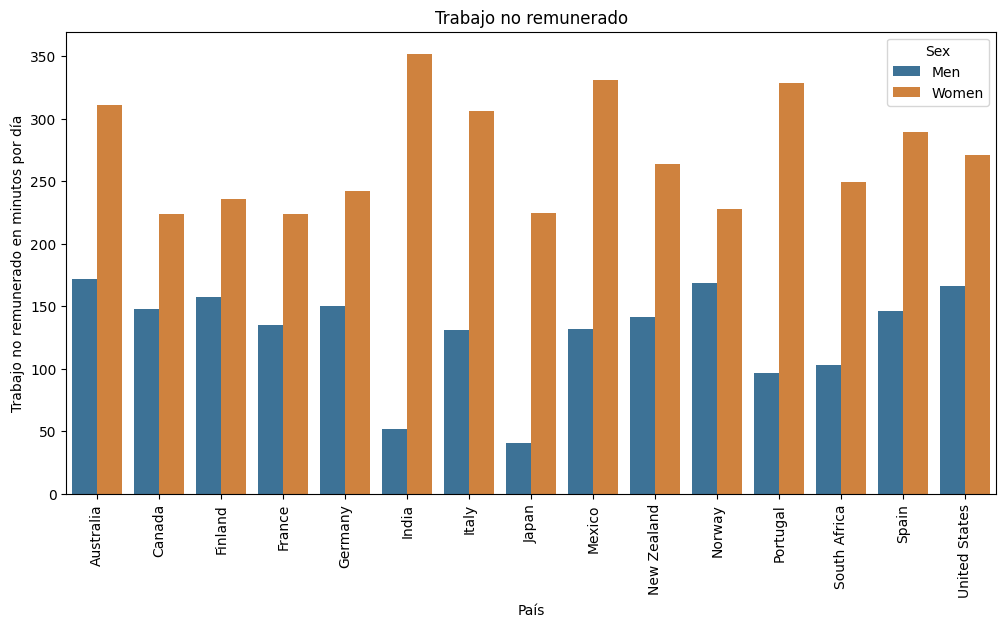

In [41]:
import matplotlib.pyplot as plt
dataHM = pd.read_excel(r'C:\\Users\\Usuario\\Desktop\\Actuariado\\Herramientas de Ciencias dse Datos II\\Proyecto\\Bases de datos\\Time use\\HM.xlsx')
unpaidHM = dataHM[dataHM['Description'] == 'Unpaid work']

ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=unpaidHM, x='Country', y='Value', hue = 'Sex', alpha=1, saturation = 0.6, ax=ax1)
ax1.set_ylabel('Trabajo no remunerado en minutos por día')
ax1.set_xlabel('País')
plt.title('Trabajo no remunerado')

Text(0.5, 1.0, 'Trabajo remunerado')

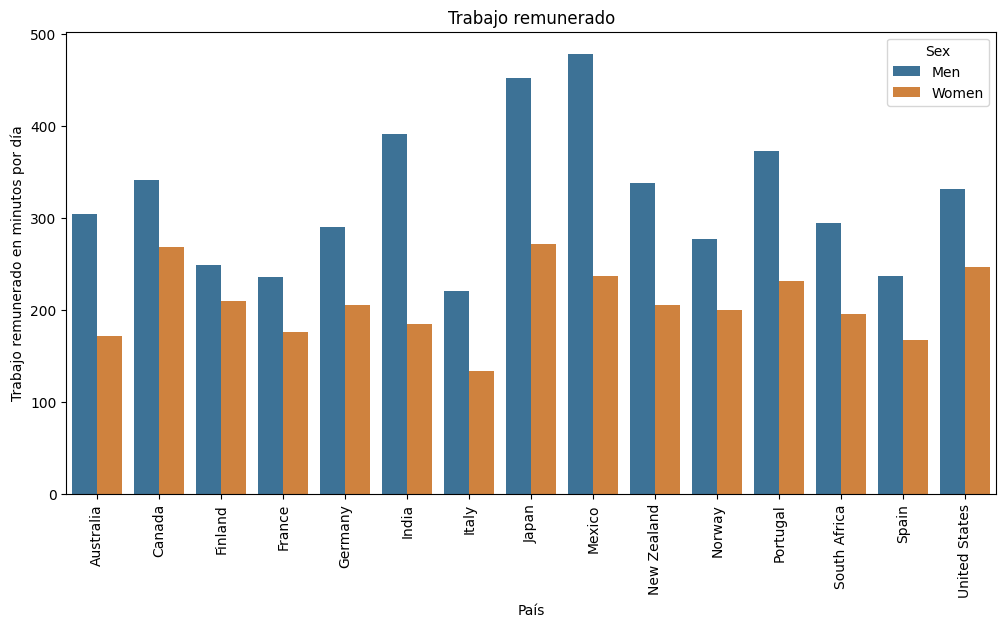

In [44]:
pawHM = dataHM[dataHM['Description'] == 'Paid work or study']
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=pawHM, x='Country', y='Value', hue = 'Sex', alpha=1, saturation = 0.6, ax=ax1)
ax1.set_ylabel('Trabajo remunerado en minutos por día')
ax1.set_xlabel('País')
plt.title('Trabajo remunerado')

Text(0.5, 1.0, 'Tiempo de Ocio')

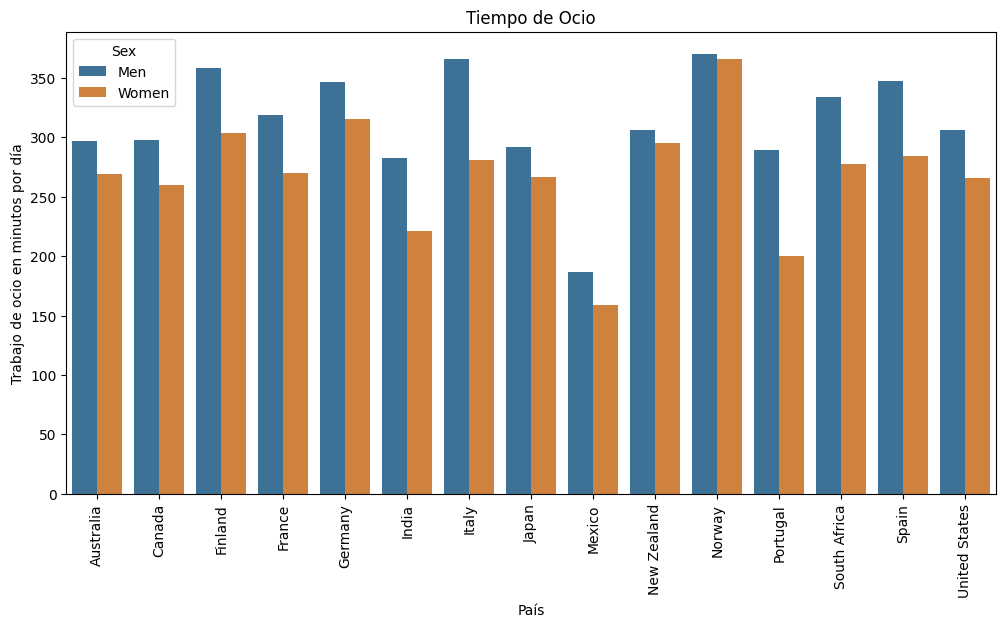

In [50]:
leiHM = dataHM[dataHM['Description'] == 'Leisure']
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.barplot(data=leiHM, x='Country', y='Value', hue = 'Sex', alpha=1, saturation = 0.6, ax=ax1)
ax1.set_ylabel('Trabajo de ocio en minutos por día')
ax1.set_xlabel('País')
plt.title('Tiempo de Ocio')

Text(0.5, 1.0, 'Productividad vs Trabajo anual')

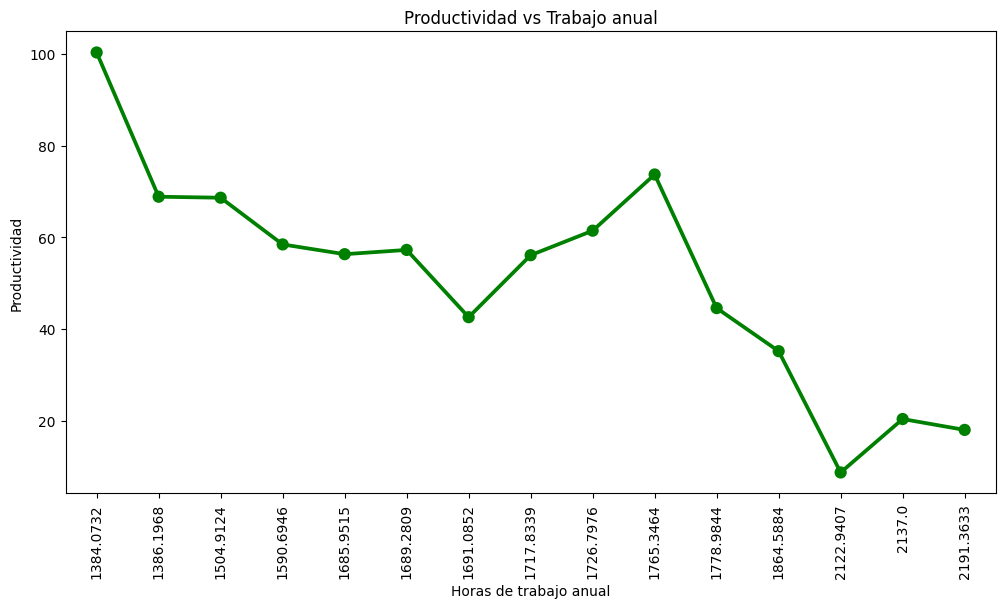

In [49]:
pw = dataHM[dataHM['DESC'] == 'PAW']
anwork = np.concatenate(pw[["Annual working hours per worker"]].to_numpy(dtype='float'))
prdty = np.concatenate(pw[["Productivity: output per hour worked"]].to_numpy(dtype='float'))
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90) 
sns.pointplot(data=pw, x='Annual working hours per worker', y='Productivity: output per hour worked', color="Green", ax=ax1)
ax1.set_ylabel('Productividad')
ax1.set_xlabel('Horas de trabajo anual')
plt.title('Productividad vs Trabajo anual')